In [1]:
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import pickle

In [2]:
with open(f"cache/training_data.pickle", 'rb') as f:
    data = pickle.load(f)
columns_output = list(map(str, list(data['limits'])))
degrees = data['degrees']
lengths = data['lengths']
degree_length_inputs = []
for degree in degrees:
    for length in lengths:
        degree_length_inputs.append(f"{degree}-{length}")

In [3]:
input_symbols = np.array(data['input_symbols'])
input_symbols_unique = set(data['input_symbols'])
data_input = pd.DataFrame(data=data['input'].transpose(), columns=degree_length_inputs)
#data_input['symbol'] = data['input_symbols']
#data_input['symbol'] = data_input['symbol'].astype('|S')
for symbol in input_symbols_unique:
    data_input[symbol] = np.where(input_symbols == symbol, True, False)

In [4]:
len(input_symbols_unique), input_symbols_unique

(19,
 {'ADAUSDT',
  'BCHUSDT',
  'BNBUSDT',
  'BTCUSDT',
  'BTTUSDT',
  'CHZUSDT',
  'DOGEUSDT',
  'EOSUSDT',
  'ETCUSDT',
  'ETHUSDT',
  'LINKUSDT',
  'LTCUSDT',
  'MATICUSDT',
  'NEOUSDT',
  'THETAUSDT',
  'TRXUSDT',
  'VETUSDT',
  'XLMUSDT',
  'XRPUSDT'})

In [5]:
data_output = pd.DataFrame(data=data['output'].transpose(), columns=columns_output)

In [6]:
df = pd.concat((data_input, data_output.reindex(data_input.index)), axis=1)
df.columns = list(map(str, list(df.columns)))
del data_input
del data_output

In [91]:
df.iloc[0:10].to_csv("hej.csv")

In [99]:
pd.read_csv("E:/BitBot/training_data/BCHUSDT.csv")

,1-5-p,1-5-d,1-7-p,1-7-d,1-11-p,1-11-d,1-15-p,1-15-d,1-22-p,1-22-d,...,LINKUSDT,LTCUSDT,MATICUSDT,NEOUSDT,THETAUSDT,TRXUSDT,VETUSDT,XLMUSDT,XRPUSDT,"(1.02,0.98)"
0,0.000470,0.000420,-5.800000e-05,0.000002,0.00069,0.000310,0.00043,0.000240,-0.00027,0.000130,...,False,False,False,False,False,False,False,False,False,-1
1,0.000760,0.000380,1.800000e-05,-0.000095,0.00071,0.000190,0.00065,0.000190,0.00057,0.000180,...,False,False,False,False,False,False,False,False,False,-1
2,0.000570,-0.000340,1.100000e-03,0.000035,0.00130,0.000057,0.00150,0.000140,0.00180,0.000200,...,False,False,False,False,False,False,False,False,False,-1
3,-0.000310,-0.000680,6.000000e-04,-0.000068,0.00075,-0.000040,0.00140,0.000140,0.00170,0.000180,...,False,False,False,False,False,False,False,False,False,-1
4,-0.000740,-0.000190,-7.300000e-04,-0.000220,-0.00055,-0.000110,0.00032,0.000120,0.00043,0.000140,...,False,False,False,False,False,False,False,False,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259679,-0.000200,-0.000830,-5.800000e-04,-0.001100,0.00110,-0.000430,0.00270,-0.000015,0.00200,-0.000100,...,False,False,False,False,False,False,False,False,False,-1
259680,-0.000027,-0.000290,-8.500000e-04,-0.000860,-0.00022,-0.000640,0.00180,-0.000110,0.00200,-0.000063,...,False,False,False,False,False,False,False,False,False,-1
259681,-0.000640,0.000250,-1.600000e-03,-0.000360,-0.00210,-0.000620,-0.00061,-0.000230,0.00040,-0.000026,...,False,False,False,False,False,False,False,False,False,-1
259682,0.000066,0.000008,4.500000e-07,0.000001,-0.00110,-0.000520,-0.00024,-0.000310,0.00130,-0.000020,...,False,False,False,False,False,False,False,False,False,-1


In [7]:
cont_names = degree_length_inputs
cat_names = list(input_symbols_unique)
y_names = list(map(str, list(data['limits'])))

In [77]:
if False:
    splits = RandomSplitter(valid_pct=0.2)(range_of(df))
else:
    all_indices = list(range_of(df))
    split_idx = int(len(all_indices) * 0.9)
    splits = (all_indices[:split_idx], all_indices[split_idx:])

In [78]:
to = TabularPandas(df, procs=[Categorify], cat_names=cat_names, cont_names=cont_names, y_names=y_names, splits=splits)

In [79]:
dls = to.dataloaders(bs=2**17)

In [80]:
learn = tabular_learner(dls, metrics=rmse)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.015848932787775993)

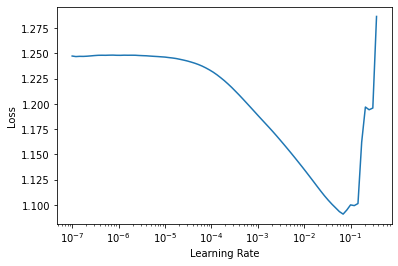

In [81]:
learn.lr_find()

In [82]:
learn.fit(1, lr=3e-2)

epoch,train_loss,valid_loss,_rmse,time
0,0.945662,0.933858,0.966363,02:04


In [84]:
learn.fit(1, lr=3e-4)

epoch,train_loss,valid_loss,_rmse,time
0,0.927702,0.934520,0.966706,02:09


In [76]:
learn.fit(1, lr=4e-4)

epoch,train_loss,valid_loss,_rmse,time


KeyboardInterrupt: 

In [56]:
learn.fit_one_cycle(10, lr_max=3e-2)

epoch,train_loss,valid_loss,_rmse,time
0,0.945937,0.941351,0.970232,01:26
1,0.909722,1.004432,1.002214,01:26


KeyboardInterrupt: 

In [85]:
learn.show_results(max_n=50)

,DOGEUSDT,ETCUSDT,LINKUSDT,THETAUSDT,XLMUSDT,LTCUSDT,CHZUSDT,BTCUSDT,BCHUSDT,XRPUSDT,EOSUSDT,TRXUSDT,MATICUSDT,NEOUSDT,ADAUSDT,VETUSDT,BTTUSDT,BNBUSDT,ETHUSDT,1-5,1-7,1-11,1-15,1-22,1-33,1-47,1-68,1-100,1-150,2-5,2-7,2-11,2-15,2-22,2-33,2-47,2-68,2-100,2-150,3-5,3-7,3-11,3-15,3-22,3-33,3-47,3-68,3-100,3-150,"(1.03, 0.93)","(1.04, 0.94)","(1.05, 0.95)","(1.06, 0.96)","(1.07, 0.97)","(1.03, 0.93)_pred","(1.04, 0.94)_pred","(1.05, 0.95)_pred","(1.06, 0.96)_pred","(1.07, 0.97)_pred"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.002209,-0.001417,-0.002109,-0.000428,2.140180e-03,0.001005,0.000051,-0.000242,-0.000058,-0.000436,0.011331,0.008559,-0.000390,-0.004972,-0.004025,0.002385,0.003003,0.001027,-0.000261,0.000426,0.009582,0.011358,0.010577,0.005268,-0.006276,-0.004175,0.000865,0.003456,0.001450,0.000050,1.0,1.0,1.0,1.0,1.0,0.333097,0.276440,0.170538,-0.031658,-0.273865
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.003073,0.001903,0.001259,0.001356,7.611008e-04,-0.000061,-0.000167,0.000134,-0.000060,-0.000098,0.006750,0.005269,0.002571,0.001428,0.001612,0.001899,0.000568,-0.000868,0.000300,0.000098,0.010737,0.007911,0.005494,0.003617,0.003387,0.002399,0.002498,0.001784,-0.000719,-0.000062,1.0,1.0,1.0,1.0,1.0,0.421933,0.359538,0.096025,0.008628,-0.201603
2,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.001828,0.002346,0.000582,-0.000385,8.673061e-05,0.000683,0.000899,0.000778,-0.000374,-0.000342,-0.002850,0.001516,0.002816,0.002406,-0.000547,-0.000874,0.000445,0.001230,0.002327,0.000026,-0.004546,-0.006217,0.002441,0.003790,0.002724,-0.000359,-0.002459,-0.000941,0.001784,0.002880,1.0,-1.0,-1.0,-1.0,-1.0,0.551868,0.159311,-0.118945,-0.307067,-0.470909
3,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.003099,0.001741,0.001999,0.001798,2.851316e-04,0.000329,0.000472,0.000478,-0.000138,-0.000404,0.004591,0.004496,0.001661,0.002904,0.003585,0.000450,0.000513,0.000480,0.001267,0.000201,0.002505,0.004974,0.004501,0.000264,0.004004,0.004747,0.000115,0.000381,0.001020,0.002336,1.0,1.0,1.0,-1.0,-1.0,0.565114,0.128352,-0.072600,-0.284845,-0.426983
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.002050,-0.001655,0.000381,-0.001806,-2.583820e-03,-0.002739,-0.001358,-0.001034,-0.000883,-0.000159,-0.007270,-0.004451,-0.001500,0.002922,-0.000035,-0.002987,-0.004489,-0.002364,-0.001648,-0.002052,-0.011569,-0.007549,-0.009986,-0.004214,0.002617,0.003303,-0.003153,-0.005446,-0.002849,-0.002197,-1.0,-1.0,-1.0,-1.0,-1.0,0.427277,0.266370,0.081231,-0.101762,-0.285292
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.004110,-0.002701,-0.003001,-0.000952,-8.448930e-04,-0.001013,-0.000101,0.000011,0.000338,-0.000237,-0.009394,-0.007770,-0.003198,-0.005712,-0.001197,-0.001092,-0.002513,-0.000882,-0.000677,0.000877,-0.013441,-0.009275,-0.006790,-0.004743,-0.008567,-0.001104,-0.000726,-0.002353,-0.001073,-0.000225,1.0,1.0,1.0,1.0,1.0,0.458937,0.207767,0.042120,-0.148286,-0.321620
6,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.002690,0.002450,0.001335,0.000047,-2.831086e-04,-0.001420,-0.000981,-0.000623,0.000026,0.000146,0.003328,0.003847,0.004900,0.004113,0.001767,0.000594,-0.001551,-0.001837,-0.001823,-0.000280,-0.000193,0.001256,0.001612,0.004975,0.003536,0.005183,0.001880,-0.000569,-0.002130,-0.002682,-1.0,-1.0,-1.0,-1.0,-1.0,0.512326,0.186525,-0.037296,-0.199483,-0.324554
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.001932,-0.000755,-0.002440,-0.001110,-5.810201e-04,-0.001214,-0.001992,-0.002086,-0.000815,-0.000355,-0.007947,-0.003423,0.000122,-0.004324,-0.001230,0.000598,-0.000205,-0.001535,-0.003959,-0.001725,-0.001240,-0.009289,-0.003484,0.002167,-0.006355,-0.003639,0.001848,0.000718,-0.001065,-0.005082,1.0,1.0,1.0,1.0,-1.0,0.411712,0.207917,0.002003,-0.165373,-0.307259
8,1.0,1.0,1.0,1.0,1.0,1

In [86]:
learn.export('model_all_2021-07-03.pickle')

In [87]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(3, 3)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(2, 2)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=86, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(